In [2]:
#!pip install qiskit
import qiskit as qk
from qiskit import IBMQ,Aer
from qiskit import *
from math import pi
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_bloch_multivector

from qiskit import QuantumCircuit, QuantumRegister, Aer, execute

We want to perform the operation $U_f = C_{01}$. But we only can perform $V_f = C_{01} C_{02}$

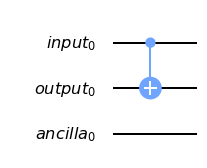

In [3]:
input_bit = QuantumRegister(1, 'input')
output_bit = QuantumRegister(1, 'output')
garbage_bit = QuantumRegister(1, 'ancilla')

Uf = QuantumCircuit(input_bit, output_bit, garbage_bit)
Uf.cx(input_bit[0], output_bit[0])

Uf.draw(output='mpl',justify='none')

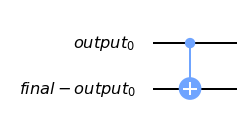

In [20]:
final_output_bit = QuantumRegister(1, 'final-output')

copy = QuantumCircuit(output_bit, final_output_bit)
copy.cx(output_bit, final_output_bit)
#copy.barrier()
copy.draw(output='mpl',justify='none')

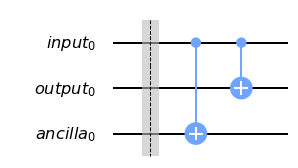

In [17]:
Vf = QuantumCircuit(input_bit, output_bit, garbage_bit)
Vf.barrier()
Vf.cx(input_bit[0], garbage_bit[0])
Vf.cx(input_bit[0], output_bit[0])
Vf.draw(output='mpl',justify='none')

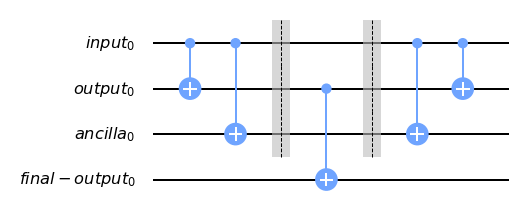

In [21]:
(Vf.inverse() + copy +  Vf).draw(output='mpl',justify='none')